<a href="https://colab.research.google.com/github/CaidanS/JAXPlayground/blob/main/Monte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymort
import numpy as np
from pymort import MortXML
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class PolicyHolder:
  def __init__(self, mortality_table, purchase_age):
    self.mortality_table = mortality_table
    self.purchase_age = purchase_age
  
  def retrieve_mortality(self, period):
    return self.mortality_table[period + self.purchase_age]

In [ ]:
class SimulationInfo:
  def __init__(self, final_period, total_payed, policy_holder, \
               initial_payment, duration, interest_rate) -> None:
    self.final_period = final_period
    self.total_payed = total_payed
    self.policy_holder = policy_holder
    self.initial_payment = initial_payment
    self.duration = duration
    self.interest_rate = interest_rate

In [ ]:
class AnnuityStream:
  def __init__(self, policy_holder: PolicyHolder, initial_payment: float, \
               duration: int, interest_rate: float = 0.05) -> None:
    self.policy_holder = policy_holder
    self.balance = 0
    self.per_period_payment = initial_payment/((1 - (1 + interest_rate)**(-duration))/interest_rate)
    self.interest_rate = interest_rate
    self.initial_payment = initial_payment
    self.duration = duration

  def simulate(self) -> SimulationInfo:
    period = 0
    while True:
      if np.random.rand() > self.policy_holder.retrieve_mortality(period):
        # Policy Holder is alive, payment must be made
        self.balance += self.per_period_payment / (1 + self.interest_rate**(period+1))
        period += 1
      else:
        # Policy Holder dies, payments should no longer be made
        break
    return SimulationInfo(final_period=period, \
                          total_payed=self.balance, \
                          policy_holder=self.policy_holder, \
                          initial_payment = self.initial_payment, \
                          duration = self.duration, \
                          interest_rate = self.interest_rate)

In [ ]:
xml = MortXML(3279)
ultimate = xml.Tables[1].Values.vals

In [ ]:
p = PolicyHolder(mortality_table=ultimate, purchase_age=20)
a = AnnuityStream(p, initial_payment=1000, duration=50)

In [ ]:
streams = [AnnuityStream(p, 1000, 50).simulate().total_payed for i in range(1000)]

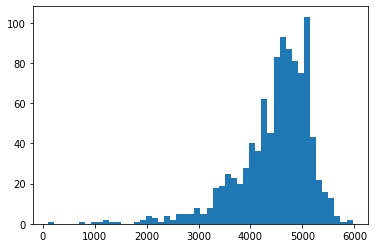

In [ ]:
plt.hist(streams, bins=50)
plt.show()